In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm,tqdm_notebook
import re
from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer
from nltk.stem.porter import *
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# ML Libs...
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [2]:
#ref - https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings

# Basic Libs..
import warnings
warnings.filterwarnings("ignore")
import math
import pandas as pd
import numpy as np
import scipy
import scipy.sparse
from tqdm import tqdm,tqdm_notebook
import pickle
import os
print('CWD is ',os.getcwd())

# Vis Libs..
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Text Libs..
import re
from gensim import corpora, models
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer
from nltk.stem.porter import *
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# ML Libs...
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# DL Libs..

CWD is  /home/ec2-user/IS434/Untitled Folder


In [8]:
df_train = pd.read_csv('train.tsv', '\t')
df_train = df_train.sample(n = 500_000)
df_train_split ,df_test_split = train_test_split(df_train,test_size = 0.25)

In [9]:
df_train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
191684,191684,GAP toddler pink ballet flats,2,Kids/Girls 2T-5T/Shoes,Gap,9.0,0,Toddler size: 6 Cute metallic pink ballet flat...
317296,317296,Flower locket and necklace bundle,2,Women/Jewelry/Necklaces,NaN,5.0,1,Magnetic locket. Locket has beautiful detail i...
257874,257874,Lularue light pink Amelia small,1,Women/Dresses/Knee-Length,LuLaRoe,38.0,1,NWT never worn just don't like it on me
765266,765266,Urbeats wireless beats by dre new in box,1,"Electronics/TV, Audio & Surveillance/Headphones",Beats by Dr. Dre,40.0,1,Urbeats wireless beats by dre new in box seale...
895238,895238,Old navy Active,3,"Women/Athletic Apparel/Pants, Tights, Leggings",Old Navy,10.0,1,Womens Old Navy Active Pants Size XXL


# Missing Data

After conducting an EDA on our dataset, we observed that name and category_name has missing data.  
We will feel the missing data with "Missing"

In [10]:
def fill_missing_data(data):
    data.brand_name.fillna(value = "Missing", inplace = True)
    data.category_name.fillna(value = "Missing", inplace = True)

fill_missing_data(df_train_split)
fill_missing_data(df_test_split)

# Remove outliers in Price Column

In [11]:
df_train_split[df_train_split["price"] < 3].count()

train_id             201
name                 201
item_condition_id    201
category_name        201
brand_name           201
price                201
shipping             201
item_description     201
dtype: int64

In [12]:
df_train_split[df_train_split["price"] > 2000].count()

train_id             1
name                 1
item_condition_id    1
category_name        1
brand_name           1
price                1
shipping             1
item_description     1
dtype: int64

In [13]:
df_train_split = df_train_split[(df_train_split.price >= 3)]
df_test_split = df_test_split[(df_test_split.price >= 3)]

Log(Price)

In [14]:
df_train_split['log_price'] = np.log1p(df_train_split['price'])
df_test_split['log_price'] = np.log1p(df_test_split['price'])

# Tokenize

## Category_name column

In [15]:
cat_unique = pd.Series("/".join(df_train_split["category_name"].unique().astype("str")).split("/")).unique()

In [16]:
print(len(cat_unique))

872


In [17]:
CV_category = CountVectorizer(vocabulary = cat_unique ,lowercase = False, binary = True)

In [18]:
CV_category.fit(df_train_split["category_name"])
df_train_transform = CV_category.transform(df_train_split["category_name"])
df_test_transform = CV_category.transform(df_test_split['category_name'])

#creates a matrix in which each unique word is represented by a column of the matrix,
#and each text sample from the document is a row in the matrix. 
#The value of each cell is nothing but the count of the word in that particular text sample. 
print(df_train_transform.shape, df_test_transform.shape)

(374799, 872) (124902, 872)


In [19]:
CV_category.get_feature_names()

['Kids',
 'Boys 0-24 Mos',
 'Shoes',
 'Electronics',
 'Cell Phones & Accessories',
 'Cell Phones & Smartphones',
 'Women',
 'Dresses',
 'Knee-Length',
 'Athletic Apparel',
 'Pants, Tights, Leggings',
 'TV, Audio & Surveillance',
 'Headphones',
 'Cases, Covers & Skins',
 'Other',
 'Tops & Blouses',
 'Blouse',
 'Jackets',
 'Above Knee, Mini',
 'Boys (4+)',
 'Sweaters',
 'Hooded',
 'Flats',
 'Sports Bras',
 'Underwear',
 'Bras',
 'Cardigan',
 'Men',
 'Tops',
 'T-shirts',
 'Home',
 'Seasonal Décor',
 'Halloween',
 "Women's Accessories",
 'Hair Accessories',
 'Beauty',
 'Makeup',
 'Makeup Palettes',
 'Hair Care',
 'Screen Protectors',
 'Athletic',
 'Toys',
 'Action Figures & Statues',
 'Handmade',
 'Accessories',
 'Lanyard',
 'Socks',
 'Fragrance',
 'Candles & Home Scents',
 'Swimwear',
 'Two-Piece',
 'Media',
 'Blu-Ray',
 "Women's Handbags",
 'Satchel',
 'Video Games & Consoles',
 'Games',
 'Girls 0-24 Mos',
 'Vintage & Collectibles',
 'Serving',
 'Tumbler',
 'T-Shirts',
 'Gadgets',
 'Nail

In [20]:
df_train_transform.toarray()

array([[1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
CV_category.vocabulary_

{'Kids': 0,
 'Boys 0-24 Mos': 1,
 'Shoes': 2,
 'Electronics': 3,
 'Cell Phones & Accessories': 4,
 'Cell Phones & Smartphones': 5,
 'Women': 6,
 'Dresses': 7,
 'Knee-Length': 8,
 'Athletic Apparel': 9,
 'Pants, Tights, Leggings': 10,
 'TV, Audio & Surveillance': 11,
 'Headphones': 12,
 'Cases, Covers & Skins': 13,
 'Other': 14,
 'Tops & Blouses': 15,
 'Blouse': 16,
 'Jackets': 17,
 'Above Knee, Mini': 18,
 'Boys (4+)': 19,
 'Sweaters': 20,
 'Hooded': 21,
 'Flats': 22,
 'Sports Bras': 23,
 'Underwear': 24,
 'Bras': 25,
 'Cardigan': 26,
 'Men': 27,
 'Tops': 28,
 'T-shirts': 29,
 'Home': 30,
 'Seasonal Décor': 31,
 'Halloween': 32,
 "Women's Accessories": 33,
 'Hair Accessories': 34,
 'Beauty': 35,
 'Makeup': 36,
 'Makeup Palettes': 37,
 'Hair Care': 38,
 'Screen Protectors': 39,
 'Athletic': 40,
 'Toys': 41,
 'Action Figures & Statues': 42,
 'Handmade': 43,
 'Accessories': 44,
 'Lanyard': 45,
 'Socks': 46,
 'Fragrance': 47,
 'Candles & Home Scents': 48,
 'Swimwear': 49,
 'Two-Piece': 50,

Truncated SVD for feature importance

What is SVD?
SVD for short, is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler.

It helps with dimensionality reduction.



In [22]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, n_iter=1)
svd.fit(df_train_transform)

TruncatedSVD(n_components=100, n_iter=1)

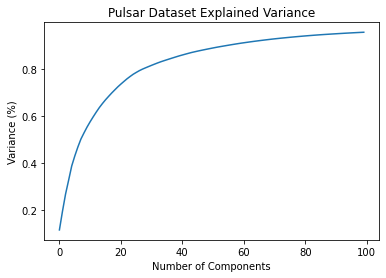

In [23]:
plt.figure()
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

with K = 80, we get an explained variance above 90%(?).Hence, 80 features or words explain 90% of our data.

We can just use these top components as our features.

## Name column

In [24]:
# vectorizer = CountVectorizer(min_df=10)
# vectorizer.fit(df_train_split['name'].values) 


# train_name = vectorizer.transform(df_train_split['name'].values)
# test_name = vectorizer.transform(df_test_split['name'].values)

# print("After vectorizations")
# print(train_name.shape)

# print(vectorizer.get_feature_names())
# print("="*100)

In [25]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
stop_words = stopwords.words('english')

def preprocess(sentence):
    sentence=str(sentence)
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stop_words]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(lemma_words)

df_train_split['name_process']=df_train_split['name'].map(lambda s:preprocess(s))
df_test_split['name_process']=df_test_split['name'].map(lambda s:preprocess(s))


In [26]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(df_train_split['name_process'].values) 


train_name = vectorizer.transform(df_train_split['name_process'].values)
test_name = vectorizer.transform(df_test_split['name_process'].values)

print("After vectorizations")
print(train_name.shape)

print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(374799, 7023)
['aaron', 'ab', 'abalon', 'abaya', 'abbey', 'abbi', 'abc', 'abercrombi', 'abh', 'about', 'abov', 'absolut', 'abstract', 'acacia', 'academi', 'acc', 'accent', 'accept', 'access', 'accessori', 'accu', 'ace', 'acer', 'acg', 'acid', 'acn', 'acoust', 'acqua', 'acryl', 'act', 'action', 'activ', 'activewear', 'actual', 'acuvu', 'ad', 'adam', 'adapt', 'adaptor', 'add', 'addi', 'addict', 'addida', 'addit', 'address', 'adel', 'adelin', 'aden', 'adhes', 'adi', 'adida', 'adjust', 'ador', 'adrianna', 'adrienn', 'adult', 'advanc', 'advantag', 'adventur', 'advisori', 'advocar', 'aeo', 'aeri', 'aero', 'aeropostal', 'aerosol', 'afflict', 'african', 'after', 'afterglow', 'against', 'agat', 'agd', 'age', 'ageless', 'agenda', 'agent', 'aggi', 'agil', 'agn', 'ah', 'aid', 'aio', 'air', 'airbrush', 'airmax', 'airplan', 'airsoft', 'airspun', 'airwalk', 'airwick', 'akira', 'alabama', 'aladdin', 'alarm', 'albert', 'album', 'alcatel', 'alchemist', 'alcon', 'aldo', 'ale', 'aleg

# Item Description

In [27]:
# function to decontract phrases
#https://stackoverflow.com/questions/43018030/replace-apostrophe-short-words-in-python
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def text_process(text):
    stop_words = stopwords.words('english')
    processed = []
    desc_length_tokenized = []
    for sentence in tqdm_notebook(text):
        sentence_decontracted = decontracted(sentence)
        sentence_decontracted = sentence_decontracted.replace('\\"', ' ')
        sentence_decontracted = sentence_decontracted.replace('\\`', ' ')
        sentence_decontracted = re.sub(r"[^0-9a-zA-Z]+", ' ', sentence_decontracted)
        text_tokens = word_tokenize(sentence_decontracted)
        desc_length_tokenized.append(len(text_tokens))
        joined_words = " ".join(word for word in text_tokens if word not in stop_words)
        processed.append(joined_words)
    return processed, desc_length_tokenized

In [28]:
df_train_split['item_description'] = df_train_split['item_description'].replace([np.nan],"No Description")
df_test_split['item_description'] = df_test_split['item_description'].replace([np.nan],"No Description")

In [29]:
df_train_split['item_desc_processed'], df_train_split['item_desc_length_tokenized'] = text_process(df_train_split['item_description'])
df_test_split['item_desc_processed'], df_test_split['item_desc_length_tokenized'] = text_process(df_test_split['item_description'])

In [30]:
df_train_split['item_desc_processed_2']=df_train_split['item_description'].map(lambda s:preprocess(s))
df_test_split['item_desc_processed_2']=df_test_split['item_description'].map(lambda s:preprocess(s))

In [31]:
# vectorizer = CountVectorizer(min_df=10)
# vectorizer.fit(df_train_split['item_desc_processed_2'].values) 


# train_name = vectorizer.transform(df_train_split['item_desc_processed_2'].values)
# test_name = vectorizer.transform(df_test_split['item_desc_processed_2'].values)

# print("After vectorizations")
# print(train_name.shape)

# print(vectorizer.get_feature_names())
# print("="*100)

In [32]:
def tokenizer(text):
    if text:
        result = re.findall('[a-z]{2,}', text.lower())
    else:
        result = []
    return result

tfidf_vectorizer=TfidfVectorizer(tokenizer=tokenizer, ngram_range=(1,3), min_df = 10, max_df = 0.5, max_features=5000, use_idf=True) 
tfidf_vectorizer_vectors_train = tfidf_vectorizer.fit_transform(df_train_split['item_desc_processed_2'])
tfidf_vectorizer_vectors_test = tfidf_vectorizer.transform(df_test_split['item_desc_processed_2'])


In [33]:
print(tfidf_vectorizer_vectors_train.shape)
print(tfidf_vectorizer_vectors_test.shape)

(374799, 5000)
(124902, 5000)


In [34]:
print(tfidf_vectorizer.get_feature_names())

['abercrombi', 'abercrombi fitch', 'abh', 'abil', 'abl', 'about', 'absolut', 'absorb', 'accent', 'accept', 'accept offer', 'access', 'accessori', 'accident', 'accord', 'accordingli', 'account', 'accur', 'achiev', 'acid', 'acn', 'across', 'acryl', 'act', 'action', 'activ', 'activ charcoal', 'actual', 'ad', 'adapt', 'add', 'addict', 'addit', 'addit item', 'address', 'adhes', 'adida', 'adjust', 'adjust shoulder', 'adjust shoulder strap', 'adjust strap', 'ador', 'adult', 'advanc', 'advantag', 'adventur', 'aeropostal', 'affect', 'afford', 'african', 'after', 'after purchas', 'age', 'ago', 'agre', 'air', 'air dri', 'air ipad', 'air jordan', 'air max', 'album', 'alcohol', 'alex', 'alex ani', 'all', 'all brand', 'all brand new', 'all free', 'all good', 'all good condit', 'all great', 'all item', 'all item come', 'all item ship', 'all new', 'all order', 'all order ship', 'all price', 'all product', 'all sale', 'all sale final', 'all size', 'allow', 'alloy', 'almond', 'almost', 'almost new', 'al

## Sentiment of item description

In [35]:
def generate_sentiment_scores(sentences):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in tqdm_notebook(sentences): 
        sentence_sentiment_score = analyzer.polarity_scores(sentence)
        results.append(sentence_sentiment_score)
    return results

In [36]:
train_senti_desc = generate_sentiment_scores(df_train_split['item_description'])
test_senti_desc = generate_sentiment_scores(df_test_split['item_description'])

In [37]:
def get_sentiments(dataframe, array):
    negative, neutral, compound, positive = [], [], [], []
    for sentiment_dict in array:
        for sentiment, score in sentiment_dict.items():
            if(sentiment=='neg'):
                negative.append(score)
            elif(sentiment=='neu'):
                neutral.append(score)
            elif(sentiment=='compound'):
                compound.append(score)
            elif(sentiment=='pos'):
                positive.append(score)
    dataframe['negative'] = negative
    dataframe['positive'] = positive
    dataframe['neutral'] = neutral
    dataframe['compound'] = compound

In [38]:
get_sentiments(df_train_split,train_senti_desc)
get_sentiments(df_test_split,test_senti_desc)

In [39]:
def get_description_features(dataframe, sentence_df):
    percentage_of_exclamation_marks, percentage_of_star, percentage_of_ampersand, percentage_of_hashtag = [], [], [], []
    for description in sentence_df:
        hashtag_regex = re.compile(r'(#[a-z]{2,})')
        percentage_of_exclamation_marks.append(description.count('!')/len(description) * 100)
        percentage_of_star.append(description.count("*")/len(description)*100)
        percentage_of_ampersand.append(description.count("%")/len(description)*100)
        percentage_of_hashtag.append(len(hashtag_regex.findall(description))/len(description)*100)
    dataframe['percentage_of_exclamation_marks'] = percentage_of_exclamation_marks
    dataframe['percentage_of_star'] = percentage_of_star
    dataframe['percentage_of_ampersand'] = percentage_of_ampersand
    dataframe['percentage_of_hashtag'] = percentage_of_hashtag

In [40]:
get_description_features(df_train_split,df_train_split['item_description'])
get_description_features(df_test_split,df_test_split['item_description'])

Vectorize item description

In [41]:
# tfidf_vectorizer=TfidfVectorizer(tokenizer=tokenizer, ngram_range=(1,3), min_df = 10, max_features=5000, use_idf=True) 
# tfidf_vectorizer_vectors_train = tfidf_vectorizer.fit_transform(df_train_split['item_desc_processed'])
# tfidf_vectorizer_vectors_test =tfidf_vectorizer.transform(df_test_split['item_desc_processed'])

In [42]:
new = pd.DataFrame.sparse.from_spmatrix(data = tfidf_vectorizer_vectors_train, columns= tfidf_vectorizer.get_feature_names())

In [43]:
new

,abercrombi,abercrombi fitch,abh,abil,abl,about,absolut,absorb,accent,accept,...,zip closur,zip hoodi,zip pocket,zipper,zipper back,zipper closur,zipper pocket,zipper work,zirconia,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Cat Brand Shipping

In [44]:
def generate_cbs_stats(train_data, test_data_to_transform):
    df_group_cat_brand_shipping = train_data.groupby('cat_brand_ship',as_index = False).agg({"shipping" : len,
                                                        "log_price" : [np.median, np.mean, np.std,np.min,np.max]})
    df_group_cat_brand_shipping.columns = ['cat_brand_ship','cat_brand_shipping_count','cat_brand_shipping_log_price_median','cat_brand_shipping_log_price_mean','cat_brand_shipping_log_price_std',
                    'cat_brand_shipping_log_price_min','cat_brand_shipping_log_price_max']

    df_group_cat_brand_shipping['cat_brand_shipping_log_price_std'] = df_group_cat_brand_shipping['cat_brand_shipping_log_price_std'].fillna(0)
    df_group_cat_brand_shipping['cat_brand_shipping_log_price_conf_variance'] = df_group_cat_brand_shipping['cat_brand_shipping_log_price_std'] / df_group_cat_brand_shipping['cat_brand_shipping_log_price_mean']
    df_group_cat_brand_shipping['cat_brand_shipping_log_count'] = np.log1p(df_group_cat_brand_shipping['cat_brand_shipping_count'])
    df_group_cat_brand_shipping['cat_brand_shipping_min_expected_log_price'] = (df_group_cat_brand_shipping['cat_brand_shipping_log_price_mean'] - (df_group_cat_brand_shipping['cat_brand_shipping_log_price_std']*2)).clip(lower=1.0)
    df_group_cat_brand_shipping['cat_brand_shipping_max_expected_log_price'] = (df_group_cat_brand_shipping['cat_brand_shipping_log_price_mean'] + (df_group_cat_brand_shipping['cat_brand_shipping_log_price_std']*2))
    
    df_group_stats_train = train_data.merge(df_group_cat_brand_shipping.reset_index(),
                                      how = 'left',
                                      on = 'cat_brand_ship')[['cat_brand_shipping_log_count',
                                                              'cat_brand_shipping_log_price_std',
                                                              'cat_brand_shipping_log_price_conf_variance',
                                                              'cat_brand_shipping_min_expected_log_price',
                                                              'cat_brand_shipping_max_expected_log_price',
                                                              'cat_brand_shipping_log_price_min',
                                                              'cat_brand_shipping_log_price_max']].fillna(0).values
    df_group_stats_test = test_data_to_transform.merge(df_group_cat_brand_shipping.reset_index(),
                                      how = 'left',
                                      on = 'cat_brand_ship')[['cat_brand_shipping_log_count',
                                                              'cat_brand_shipping_log_price_std',
                                                              'cat_brand_shipping_log_price_conf_variance',
                                                              'cat_brand_shipping_min_expected_log_price',
                                                              'cat_brand_shipping_max_expected_log_price',
                                                              'cat_brand_shipping_log_price_min',
                                                              'cat_brand_shipping_log_price_max']].fillna(0).values
    scaler = StandardScaler(copy=True)
    cat_brand_shipping_feats_scaled_train = scaler.fit_transform(df_group_stats_train)
    cat_brand_shipping_fit = scaler.fit(df_group_stats_train)
    #fit with training, then transform test data using train data mean and SD
    cat_brand_shipping_feats_scaled_test = scaler.transform(df_group_stats_test)

    return cat_brand_shipping_feats_scaled_train, cat_brand_shipping_feats_scaled_test

In [45]:
df_train_split['cat_brand_ship'] = (df_train_split['category_name'].astype(str) + "_" + 
                                    df_train_split['brand_name'].astype(str) + "_" +  
                                    df_train_split['shipping'].astype(str))

df_test_split['cat_brand_ship'] = (df_test_split['category_name'].astype(str) + "_" + 
                                    df_test_split['brand_name'].astype(str) + "_" +  
                                    df_test_split['shipping'].astype(str))

In [46]:
train_cbs_feats, test_cbs_feats = generate_cbs_stats(df_train_split,df_test_split)

In [47]:
train_cbs_feats.shape
test_cbs_feats.shape

(124902, 7)

In [48]:
stats_train = pd.DataFrame(train_cbs_feats,columns = ['cbs_log_count','cbs_log_price_std',
                                             'cbs_log_price_conf_variance','cbs_min_expected_log_price',
                                             'cbs_max_expected_log_price','cbs_log_price_min','cbs_log_price_max'])

stats_test = pd.DataFrame(test_cbs_feats,columns = ['cbs_log_count','cbs_log_price_std',
                                             'cbs_log_price_conf_variance','cbs_min_expected_log_price',
                                             'cbs_max_expected_log_price','cbs_log_price_min','cbs_log_price_max'])

#  Item condition + Shipping Dummies

In [49]:
#itemcondition and shipping, create dummy variables
item_shipping_dummies_train = scipy.sparse.csr_matrix(pd.get_dummies(df_train_split[['item_condition_id', 'shipping']],
                                      sparse=True).values)
item_shipping_dummies_test = scipy.sparse.csr_matrix(pd.get_dummies(df_test_split[['item_condition_id', 'shipping']],
                                      sparse=True).values)

# Brand Name

In [50]:
df_train_split['brand_name'] = df_train_split['brand_name'].replace([np.nan],"No Brand Name")
df_test_split['brand_name'] = df_test_split['brand_name'].replace([np.nan],"No Brand Name")

In [51]:
#Label Binarizer 
# It assigns a unique value or number to each label in a categorical feature.
# It encodes categorical integer features as a one-hot numeric array. 
#It makes model training easier and faster.
#it encodes the data into dummy variables 
#indicating the presence of a particular label or not
lb = LabelBinarizer(sparse_output=True)
fitting_brand_name = lb.fit(df_train_split['brand_name'])
X_brand_train = lb.transform(df_train_split['brand_name'])
X_brand_test = lb.transform(df_test_split['brand_name'])

In [52]:
X_brand_test.shape

(124902, 3220)

In [53]:
print(df_train_split['brand_name'][:10])

1222191                 Ralph Lauren
218909                         Apple
512110     Customized & Personalized
586891                    FOREVER 21
24305                        Missing
100481                       Missing
964229                       Mossimo
772744                       Missing
490535                       Mossimo
1148702                      Missing
Name: brand_name, dtype: object


In [54]:
print(X_brand_train[:10])

  (0, 2378)	1
  (1, 185)	1
  (2, 765)	1
  (3, 995)	1
  (4, 1928)	1
  (5, 1928)	1
  (6, 1959)	1
  (7, 1928)	1
  (8, 1959)	1
  (9, 1928)	1


In [55]:
df_corr = pd.concat([pd.DataFrame(df_train_split,
                                  columns = ['item_desc_length_tokenized','negative', 'neutral', 'compound', 'positive','percentage_of_exclamation_marks', 'percentage_of_star', 'percentage_of_ampersand', 'percentage_of_hashtag']),
                    pd.DataFrame(train_cbs_feats,
                                  columns = ['cbs_log_count','cbs_log_price_std',
                                             'cbs_log_price_conf_variance','cbs_min_expected_log_price',
                                             'cbs_max_expected_log_price','cbs_log_price_min','cbs_log_price_max']),
                    df_train_split['log_price'].reset_index(drop = True)],axis = 1)

In [56]:
#df_corr = pd.concat([df_train_split['log_price'].reset_index(drop = True)],axis = 1)

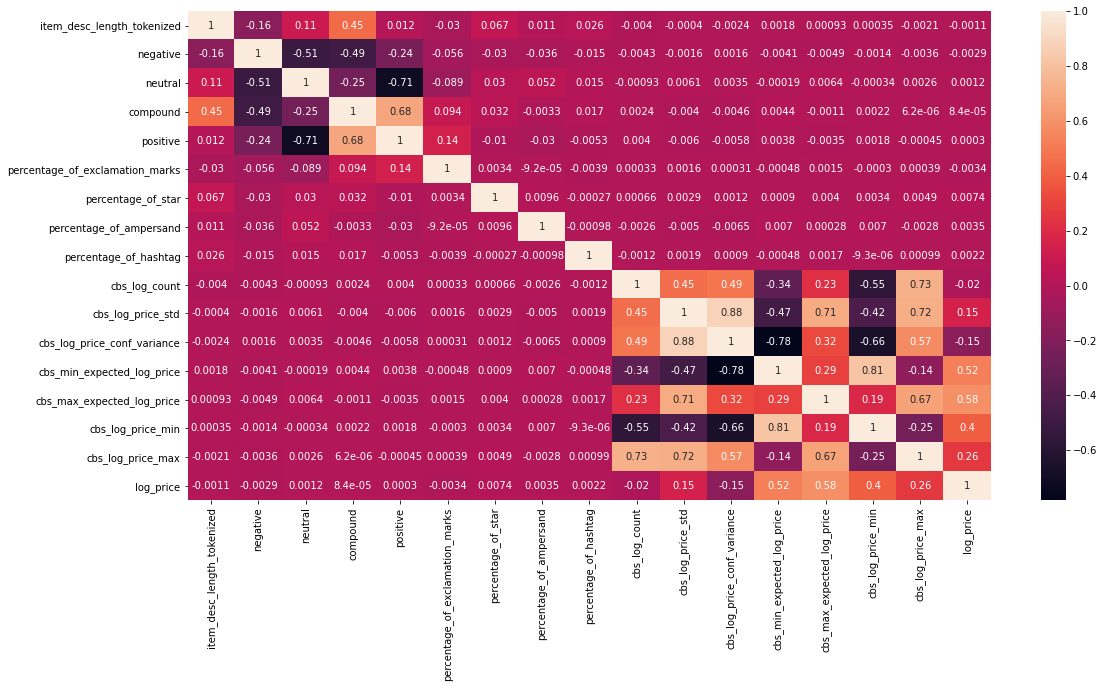

In [57]:
corrMatrix  = df_corr.corr()

plt.figure(figsize = (18,9))
sns.heatmap(corrMatrix, annot=True)
plt.show()

Percentage of hashtag, Percentage of ampersand, Percentage of star, Percentage of exclamation marks
has a low correlation with log price and thus we are dropping.



# X_train and X_test

In [58]:
X_train = scipy.sparse.hstack((train_cbs_feats,
                               X_brand_train,
                               df_train_transform,
                               tfidf_vectorizer_vectors_train,
                               item_shipping_dummies_train,
                               train_name,
                               np.array(df_train_split['negative'])[:,None],
                               np.array(df_train_split['neutral'])[:,None],
                               np.array(df_train_split['compound'])[:,None],
                               np.array(df_train_split['positive'])[:,None]
                              )).tocsr().astype('float32')

X_test = scipy.sparse.hstack((test_cbs_feats,
                               X_brand_test,
                              df_test_transform,
                              tfidf_vectorizer_vectors_test,
                              item_shipping_dummies_test,
                              test_name,
                              np.array(df_test_split['negative'])[:,None],
                              np.array(df_test_split['neutral'])[:,None],
                              np.array(df_test_split['compound'])[:,None],
                              np.array(df_test_split['positive'])[:,None]
                              )).tocsr().astype('float32')

y_train = df_train_split['log_price']
y_test = df_test_split['log_price']

print("X_train Shape is ",X_train.shape)
print("X_test Shape is ",X_test.shape)
print("y_train Shape is ",y_train.shape)
print("y_test Shape is ",y_test.shape)

X_train Shape is  (374799, 16128)
X_test Shape is  (124902, 16128)
y_train Shape is  (374799,)
y_test Shape is  (124902,)


In [59]:
print(train_cbs_feats.shape, test_cbs_feats.shape)
print(X_brand_train.shape, X_brand_test.shape)
print(df_train_transform.shape, df_test_transform.shape)
print(tfidf_vectorizer_vectors_train.shape, tfidf_vectorizer_vectors_test.shape)
print(train_name.shape, test_name.shape)

(374799, 7) (124902, 7)
(374799, 3220) (124902, 3220)
(374799, 872) (124902, 872)
(374799, 5000) (124902, 5000)
(374799, 7023) (124902, 7023)


In [3]:
from scipy import sparse
import pandas as pd
# Uncomment out to save for the first time. Subsequent times only need to load
# sparse.save_npz("X_train.npz", X_train)
# sparse.save_npz("X_test.npz", X_test)
# y_train.to_pickle("y_train")
# y_test.to_pickle("y_test")


#Keep uncommented to load. 
X_train = sparse.load_npz("X_train.npz")
X_test = sparse.load_npz("X_test.npz")

y_train = pd.read_pickle("y_train")
y_test = pd.read_pickle("y_test")

# LightGBM

In [4]:
from lightgbm import LGBMRegressor
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [5]:
#below are using the default/typical values 
lgbm_params ={
            'learning_rate': 0.1,
            'n_estimators': 100,
            'num_leaves': 31,
            'max_depth' : 7,
            'boosting_type' : ['gbdt'],
            'min_child_samples': 20, 
            'objective': 'regression'
}

In [6]:
lgbm_model = LGBMRegressor(**lgbm_params)
lgbm_model.fit(X_train, y_train, early_stopping_rounds=None,verbose=True)

lgbm_pred_train = lgbm_model.predict(X_train)
lgbm_pred_test  = lgbm_model.predict(X_test)

print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, lgbm_pred_train))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, lgbm_pred_train))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, lgbm_pred_train)))
print('Train R^2:',r2_score(y_train, lgbm_pred_train))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, lgbm_pred_test))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, lgbm_pred_test))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lgbm_pred_test)))
print('Test R^2:',r2_score(y_test, lgbm_pred_test))

Train Mean Absolute Error: 0.3622203285705751
Train Mean Squared Error: 0.23675226899763877
Train Root Mean Squared Error: 0.48657195664941355
Train R^2: 0.574193374047063
------------------------------
Test Mean Absolute Error: 0.4292816438534104
Test Mean Squared Error: 0.34217866494148114
Test Root Mean Squared Error: 0.5849603960453059
Test R^2: 0.3849024943232153


# Lasso

In [7]:
from sklearn.linear_model import Lasso

reg_lasso = Lasso(alpha=0.1)
reg_lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [8]:
lasso_y_pred_train = reg_lasso.predict(X_train)
lasso_y_pred_test = reg_lasso.predict(X_test)

print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, lasso_y_pred_train))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, lasso_y_pred_train))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, lasso_y_pred_train)))
print('Train R^2:',r2_score(y_train, lasso_y_pred_train))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, lasso_y_pred_test))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, lasso_y_pred_test))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lasso_y_pred_test)))
print('Test R^2:',r2_score(y_test, lasso_y_pred_test))

Train Mean Absolute Error: 0.4219886173178592
Train Mean Squared Error: 0.30873550106558456
Train Root Mean Squared Error: 0.5556397223611579
Train R^2: 0.4447291991024719
------------------------------
Test Mean Absolute Error: 0.521929005366786
Test Mean Squared Error: 0.5515658415460954
Test Root Mean Squared Error: 0.742674788548861
Test R^2: 0.008509857242149144


# KNN

In [12]:
#Create the kNN Regressor and set the number of neighbors to be 3
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

knn_y_pred_train = knn_regressor.predict(X_train)
knn_y_pred_test = knn_regressor.predict(X_test)

In [13]:
print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, knn_y_pred_train))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, knn_y_pred_train))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, knn_y_pred_train)))
print('Train R^2:',r2_score(y_train, knn_y_pred_train))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, knn_y_pred_test))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, knn_y_pred_test))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred_test)))
print('Test R^2:',r2_score(y_test, knn_y_pred_test))

Train Mean Absolute Error: 0.2752162040362085
Train Mean Squared Error: 0.14494149657786196
Train Root Mean Squared Error: 0.38071182878636955
Train R^2: 0.7393180226754065
------------------------------
Test Mean Absolute Error: 0.4612276844313992
Test Mean Squared Error: 0.4226163278505136
Test Root Mean Squared Error: 0.6500894768033963
Test R^2: 0.24030842436190625


# Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize= True)
lr.fit(X_train, y_train)

lr_y_pred_train = lr.predict(X_train)
lr_y_pred_test = lr.predict(X_test)

Train Mean Absolute Error: 0.3441525562455659
Train Mean Squared Error: 0.2099091958964051
Train Root Mean Squared Error: 0.45815848338364873
Train R^2: 0.6224715106657173
------------------------------
Test Mean Absolute Error: 258.60725423972735
Test Mean Squared Error: 24145115.447834652
Test Root Mean Squared Error: 4913.767948106081
Test R^2: -43403056.5482577


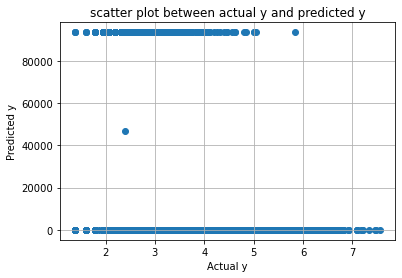

In [7]:
print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, lr_y_pred_train))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, lr_y_pred_train))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, lr_y_pred_train)))
print('Train R^2:',r2_score(y_train, lr_y_pred_train))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_y_pred_test))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, lr_y_pred_test))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred_test)))
print('Test R^2:',r2_score(y_test, lr_y_pred_test))      
      
plt.scatter(y_test, lr_y_pred_test)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()

# Stochastic Gradient Descent (SGD)

In [8]:
from sklearn.linear_model import SGDRegressor

sgd =  SGDRegressor(loss='squared_loss', penalty='l2', random_state= 101, max_iter=5)
params= {
    'alpha': [0.0000000001, 0.00000001, 0.00001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000] ,
         'learning_rate':['invscaling', 'adaptive']}
gridsearchcv = GridSearchCV(sgd, param_grid = params, return_train_score = True)
gridsearchcv.fit(X_train, y_train)

sgd.fit(X_train, y_train)

sgd_y_pred_train = sgd.predict(X_train)
sgd_y_pred_test = sgd.predict(X_test)

Train Mean Absolute Error: 0.36526515743581656
Train Mean Squared Error: 0.24059005124749705
Train Root Mean Squared Error: 0.49049979739801836
Train R^2: 0.5672909983364822
------------------------------
Test Mean Absolute Error: 0.48055525920766146
Test Mean Squared Error: 0.5472338974163088
Test Root Mean Squared Error: 0.7397525920308146
Test R^2: 0.016296923771906724


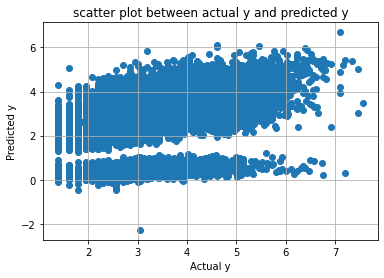

In [9]:
print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, sgd_y_pred_train))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, sgd_y_pred_train))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, sgd_y_pred_train)))
print('Train R^2:',r2_score(y_train, sgd_y_pred_train))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, sgd_y_pred_test))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, sgd_y_pred_test))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, sgd_y_pred_test)))
print('Test R^2:',r2_score(y_test, sgd_y_pred_test))

plt.scatter(y_test, sgd_y_pred_test)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()

# Ridge Regression

In [10]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(solver="sag", fit_intercept=True, random_state=150)
ridge_model.fit(X_train, y_train) 
ridge_model_pred_train = ridge_model.predict(X_train)
ridge_model_pred_test = ridge_model.predict(X_test)

In [11]:
print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, ridge_model_pred_train))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, ridge_model_pred_train))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, ridge_model_pred_train)))
print('Train R^2:',r2_score(y_train, ridge_model_pred_train))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_model_pred_test))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_model_pred_test))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ridge_model_pred_test)))
print('Test R^2:',r2_score(y_test, ridge_model_pred_test))

Train Mean Absolute Error: 0.3376704914183122
Train Mean Squared Error: 0.20225770195740655
Train Root Mean Squared Error: 0.44973069937175353
Train R^2: 0.6362329704036038
------------------------------
Test Mean Absolute Error: 0.44681750252348396
Test Mean Squared Error: 0.45356754389398446
Test Root Mean Squared Error: 0.6734742340238299
Test R^2: 0.18467077731790338


## Random Forest

In [5]:
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [10]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
rf_regressor.fit(X_train, y_train) 

RandomForestRegressor(n_jobs=-1, random_state=0)

In [11]:
rf_pred_train = rf_regressor.predict(X_train)
rf_pred_test = rf_regressor.predict(X_test)

In [12]:
print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, rf_pred_train))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, rf_pred_train))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, rf_pred_train)))
print('Train R^2:',r2_score(y_train, rf_pred_train))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred_test))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred_test))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred_test)))
print('Test R^2:',r2_score(y_test, rf_pred_test))

Train Mean Absolute Error: 0.12599608473763024
Train Mean Squared Error: 0.031320201818753016
Train Root Mean Squared Error: 0.17697514463549116
Train R^2: 0.943669602335506
------------------------------
Test Mean Absolute Error: 0.41772625542225894
Test Mean Squared Error: 0.35986883460521535
Test Root Mean Squared Error: 0.5998906855463046
Test R^2: 0.35310279331899597
